In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/justinpeter/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### We start by importing the libraries

- By importing pandas, we can read the csv file

- More information is found on this link : [Cases and Deaths](https://github.com/nytimes/covid-19-data/blob/master/us-states.csv)

In [2]:
covid = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
print(covid.shape)
covid.head()

(13489, 5)


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


- As you can see, we have 13,489 rows and 5 columns

## Find the total number of cases and deaths in each state

In [3]:
states = ['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
 'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida', 'New York',
 'Rhode Island', 'Georgia', 'New Hampshire', 'North Carolina', 'New Jersey',
 'Colorado', 'Maryland' ,'Nevada', 'Tennessee', 'Hawaii', 'Indiana', 'Kentucky',
 'Minnesota', 'Oklahoma' ,'Pennsylvania', 'South Carolina',
 'District of Columbia', 'Kansas' ,'Missouri', 'Vermont', 'Virginia',
 'Connecticut', 'Iowa', 'Louisiana' ,'Ohio', 'Michigan' ,'South Dakota',
 'Arkansas', 'Delaware','Mississippi', 'New Mexico' ,'North Dakota' 'Wyoming',
 'Alaska', 'Maine', 'Alabama', 'Idaho' ,'Montana' ,'Puerto Rico',
 'Virgin Islands' ,'Guam', 'West Virginia' ,'Northern Mariana Islands']

- We create a list that includes the unique values for the column state from the data

- From there, we make a for loop that takes in a dataframe of all cases and deaths that correspond to each state

In [4]:
place = [] # empty lists
case = []
death = []

for i in states:
	state=covid[covid['state']==i]
	places = i
	cases = state['cases'].max() # total number of cases and deaths that accumulate by the end of the data
	deaths = state['deaths'].max()
	place.append(places) # send the results back to the empty lists
	case.append(cases)
	death.append(deaths)

- When we append results to empty lists, we proceed to make a dictionary that takes in column names to column values

- After that, we can transform the dictionary that consists of the States, Cases, and Deaths, into one full dataframe

In [5]:
data = {'States':place,
		'Cases':case,
		'Deaths':death}

newdata = pd.DataFrame(data)
newdata.head()

,States,Cases,Deaths
0,Washington,114787.0,2484.0
1,Illinois,431281.0,10115.0
2,California,944141.0,17700.0
3,Arizona,248293.0,5982.0
4,Massachusetts,160549.0,10023.0


- We sort values now because we want the first 10 states with the most number of cases/deaths

In [6]:
newcases = newdata.sort_values(by=['Cases'],ascending=False)
newdeaths = newdata.sort_values(by=['Deaths'],ascending=False)
newcases.head()

,States,Cases,Deaths
6,Texas,965029.0,18626.0
2,California,944141.0,17700.0
10,Florida,812055.0,16833.0
11,New York,516114.0,33187.0
1,Illinois,431281.0,10115.0


- It's always important to reset the index and remember that you have an option to add the index as a column

In [7]:
newcases = newcases.reset_index(drop=True)
newdeaths = newdeaths.reset_index(drop=True)
newcases.head()

,States,Cases,Deaths
0,Texas,965029.0,18626.0
1,California,944141.0,17700.0
2,Florida,812055.0,16833.0
3,New York,516114.0,33187.0
4,Illinois,431281.0,10115.0


- We will make two variables called casecount and deathcount

- The idea is we will use the pandas iloc command in order to extract the first 10 rows

- In addition, we will select the columns in order starting from cases and then adding the extra column for deaths

In [8]:
casecount = newcases.iloc[0:10,0:2]
deathcount = newdeaths.iloc[0:10,0:3]

- Our analysis is complete

- Let's use seaborn bargraph to find out the ten states that have the most cases and most deaths

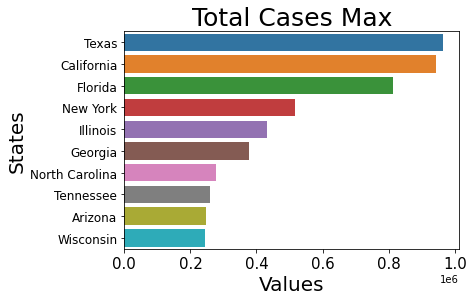

In [9]:
sns.barplot(data=casecount,y='States',x='Cases')
plt.title('Total Cases Max',fontsize=25)
plt.xlabel('Values',fontsize=20)
plt.ylabel('States',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()

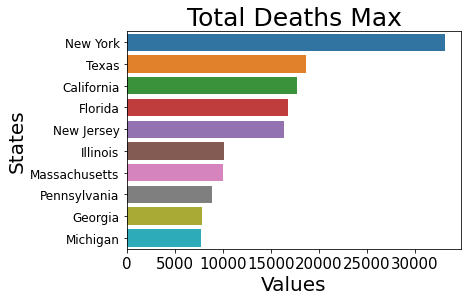

In [10]:
sns.barplot(data=deathcount,y='States',x='Deaths')
plt.title('Total Deaths Max',fontsize=25)
plt.xlabel('Values',fontsize=20)
plt.ylabel('States',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()		

### Small Insights

- I'm from New York so let's analyze the graphs based on that

- The fact is Texas, California, and Florida have way more cases than New York ever will

- However, New York far surpasses these three states in total deaths

- The question is why???